# Set the project environment
1.   Create folder space
2.   Download training data
3.   Unzip data set into folder
4.   Remove unnecessary folders and files



In [1]:
!mkdir "project_space"
!wget "https://www.changsiang.net/files/fundus.dataset.zip" --directory-prefix="./project_space/" 
!unzip -o -q "./project_space/fundus.dataset.zip" -d "./project_space/" && rm -r './project_space/__MACOSX' && rm './project_space/fundus.dataset/train/classes/.DS_Store'

--2022-11-05 06:36:33--  https://www.changsiang.net/files/fundus.dataset.zip
Resolving www.changsiang.net (www.changsiang.net)... 172.67.214.20, 104.21.42.249, 2606:4700:3030::ac43:d614, ...
Connecting to www.changsiang.net (www.changsiang.net)|172.67.214.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30477591 (29M) [application/x-zip-compressed]
Saving to: ‘./project_space/fundus.dataset.zip’

fundus.dataset.zip  100%[===================>]  29.07M  58.8MB/s    in 0.5s    

2022-11-05 06:36:34 (58.8 MB/s) - ‘./project_space/fundus.dataset.zip’ saved [30477591/30477591]

rm: cannot remove './project_space/fundus.dataset/train/classes/.DS_Store': No such file or directory


# Inspect the data set

In [2]:
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
categories = os.listdir('./project_space/fundus.dataset/train/classes')
print(categories)

['choroidal nevus', 'roth spot', 'optic cup', 'hard exudates', 'microaneurysm', 'optic disc', 'drusen', 'dot hemorrhage', 'artefact', 'fovea', 'blot hemorrhage', 'epiretinal membrane', 'pigmentation', 'cotton wool spot', 'myelinated nerve fibre layer', 'flame shaped hemorrhage']


roth spot


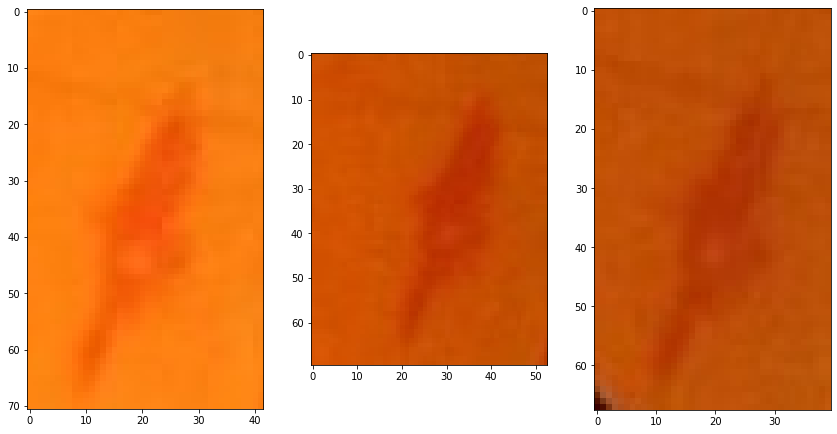

In [4]:
plt.figure(figsize=(50,50))
columns = 10
target_cls = 'roth spot'
cls_dir = './project_space/fundus.dataset/train/classes/{}/'.format(target_cls)
print(target_cls)
for index, img_path in enumerate(os.listdir('{}'.format(cls_dir))):
  img = cv2.imread('{}{}'.format(cls_dir,img_path))

  # pyplot and cv2 has different color index
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(len(os.listdir('{}'.format(cls_dir))) / columns + 1, columns, index + 1)
  plt.imshow(img)

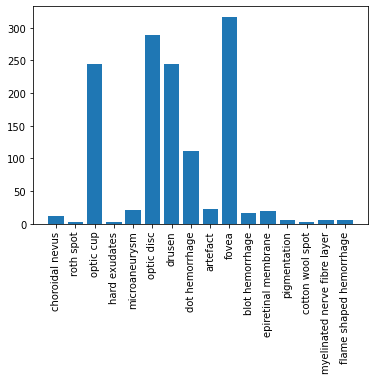

In [5]:
# look at the distribution of classes
def cls_distribution():
  cls_len = []
  cls_label = []
  for index, cls in enumerate(os.listdir('./project_space/fundus.dataset/train/classes')):
    path = './project_space/fundus.dataset/train/classes/{}/'.format(cls)
    if not os.path.isdir(path): continue
    cls_label.append(cls)
    cls_len.append(len(os.listdir(path)))
  cls_len
  plt.bar(cls_label,cls_len)
  plt.xticks(rotation=90)
  plt.show()
# Preview classes
cls_distribution()

In [6]:
# # remove overrepresented classes
!rm -rf "./project_space/fundus.dataset/train/classes/fovea/"
!rm -rf "./project_space/fundus.dataset/train/classes/drusen/"
!rm -rf "./project_space/fundus.dataset/train/classes/dot hemorrhage/"
!rm -rf "./project_space/fundus.dataset/train/classes/optic cup/"
!rm -rf "./project_space/fundus.dataset/train/classes/optic disc/"
# !rm -rf "./project_space/fundus.dataset/train/classes/hard exudates/"
# !rm -rf "./project_space/fundus.dataset/train/classes/myelinated nerve fibre layer/"
# !rm -rf "./project_space/fundus.dataset/train/classes/roth spot/"
# !rm -rf "./project_space/fundus.dataset/train/classes/pigmentation/"
# !rm -rf "./project_space/fundus.dataset/train/classes/cotton wool spot/"
# !rm -rf "./project_space/fundus.dataset/train/classes/choroidal nevus"
# !rm -rf "./project_space/fundus.dataset/train/classes/blot hemorrhage/"
# !rm -rf "./project_space/fundus.dataset/train/classes/microaneurysm/"
# !rm -rf "./project_space/fundus.dataset/train/classes/artefact/"
# !rm -rf "./project_space/fundus.dataset/train/classes/epiretinal membrane/"
# !rm -rf "./project_space/fundus.dataset/train/classes/flame shaped hemorrhage/"

In [7]:
categories = os.listdir('./project_space/fundus.dataset/train/classes')
print(categories)

['choroidal nevus', 'roth spot', 'hard exudates', 'microaneurysm', 'artefact', 'blot hemorrhage', 'epiretinal membrane', 'pigmentation', 'cotton wool spot', 'myelinated nerve fibre layer', 'flame shaped hemorrhage']


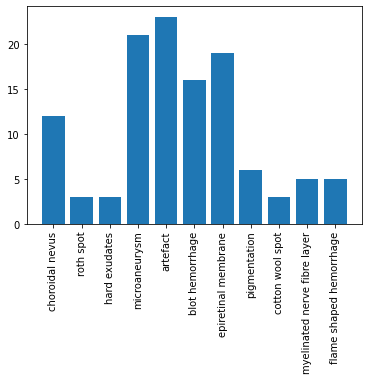

In [8]:
cls_distribution()

# Image Preprocessing
Prepare the dataset for model building

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import expand_dims
import cv2
import numpy as np

def flip(img):
  data=np.array(img)
  samples=expand_dims(data,0)
  datagen = ImageDataGenerator(vertical_flip=True)
  it = datagen.flow(samples, batch_size=1)

def rotate(img):
  data = np.array(img)
  samples = expand_dims(data, 0)
  data_generated = ImageDataGenerator(rotation_range=90)
  it = data_generated.flow(samples, batch_size=1)

def brightness(img):
  data = np.array(img)
  samples = expand_dims(data, 0)
  datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
  it = datagen.flow(samples, batch_size=1)

def histogram_equal(img):
  YCrCb=cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
  (Y,Cr,Cb)=cv2.split(YCrCb)
  Y=cv2.equalizeHist(Y)
  enhanced_YCrCb=cv2.cvtColor(cv2.merge([Y,Cr,Cb]),cv2.COLOR_YCR_CB2BGR)

def histogram_clahe(img):
  ycrcb=cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
  channels=cv2.split(ycrcb)
  clahe=cv2.createCLAHE(clipLimit=10.0, tileGridSize=(3, 3))
  clahe.apply(channels[0],channels[0])
  cv2.merge(channels,ycrcb)
  img=cv2.cvtColor(ycrcb,cv2.COLOR_YCR_CB2BGR, img)

def image_normalization(img):
  img=(img-np.min(img))/(np.max(img)-np.min(img))
  return img

def black_area_replace(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  black_pixels=np.where((img[:,:,0]<110)&(img[:,:,1]<110)&(img[:,:,2]<110))
  img[black_pixels]=[252,108,38]
  return img

def fast_forier_transformation(img):
  return img

In [10]:
def image_preprocessing(img):
  img = black_area_replace(img)
  img = image_normalization(img)
  return img

In [11]:
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import numpy as np

cls_dir = './project_space/fundus.dataset/train/classes/'

flat_data_array = []
target_array = []
for c in categories :
  print(f'loading... category: {c}')
  img_path =os.path.join(cls_dir, c)
  for img in os.listdir(img_path):
    img_array = imread(os.path.join(img_path, img))
    img_array = image_preprocessing(img_array)
    img_resized = resize(img_array, (25, 25, 3))
    flat_data_array.append(img_resized.flatten())
    target_array.append(categories.index(c))
  print(f'loaded category: {c} successfully')

flat_data = np.array(flat_data_array)
target=np.array(target_array)
df = pd.DataFrame(flat_data)
df['Target'] = target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data
df.head()

loading... category: choroidal nevus
loaded category: choroidal nevus successfully
loading... category: roth spot
loaded category: roth spot successfully
loading... category: hard exudates
loaded category: hard exudates successfully
loading... category: microaneurysm
loaded category: microaneurysm successfully
loading... category: artefact
loaded category: artefact successfully
loading... category: blot hemorrhage
loaded category: blot hemorrhage successfully
loading... category: epiretinal membrane
loaded category: epiretinal membrane successfully
loading... category: pigmentation
loaded category: pigmentation successfully
loading... category: cotton wool spot
loaded category: cotton wool spot successfully
loading... category: myelinated nerve fibre layer
loaded category: myelinated nerve fibre layer successfully
loading... category: flame shaped hemorrhage
loaded category: flame shaped hemorrhage successfully


,0,1,2,3,4,5,6,7,8,9,...,1866,1867,1868,1869,1870,1871,1872,1873,1874,Target
0,0.043557,0.428973,0.889722,0.043166,0.428914,0.888189,0.041642,0.434918,0.883739,0.040097,...,0.011208,0.432312,0.973237,0.016306,0.438504,0.987169,0.020495,0.439683,0.994468,0
1,0.027151,0.435416,0.998592,0.027587,0.431427,0.997360,0.035119,0.430028,0.992086,0.028283,...,0.097034,0.433177,0.995437,0.088581,0.446452,0.983731,0.167642,0.565195,0.993952,0
2,0.042949,0.451744,0.995539,0.048538,0.449150,0.987417,0.048818,0.440980,0.961289,0.040715,...,0.030500,0.388357,0.897927,0.025289,0.386752,0.890481,0.018649,0.391853,0.887071,0
3,0.008935,0.436198,0.914636,0.005083,0.432031,0.910255,0.001754,0.430041,0.902545,0.001487,...,0.014103,0.381164,0.987390,0.003126,0.314617,0.979697,0.007466,0.312584,0.986520,0
4,0.060568,0.445142,0.937034,0.056325,0.444181,0.926941,0.053303,0.445232,0.917396,0.056959,...,0.012517,0.440449,0.988690,0.009477,0.433913,0.991918,0.016729,0.437663,0.995927,0


# Model Training
Define a ML approach and train the model

Example code for SVM classifier

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svm = SVC(C=0.1, gamma = 0.1, kernel = 'poly', probability=True)
param_grid={'C':[0.01, 0.1, 0.3, 0.5],'gamma':['scale', 'auto'],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
model = GridSearchCV(svm, param_grid)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


The model is 60.0% accurate


In [13]:
print(f'Best SVM parameters: {model.best_params_}')

Best SVM parameters: {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


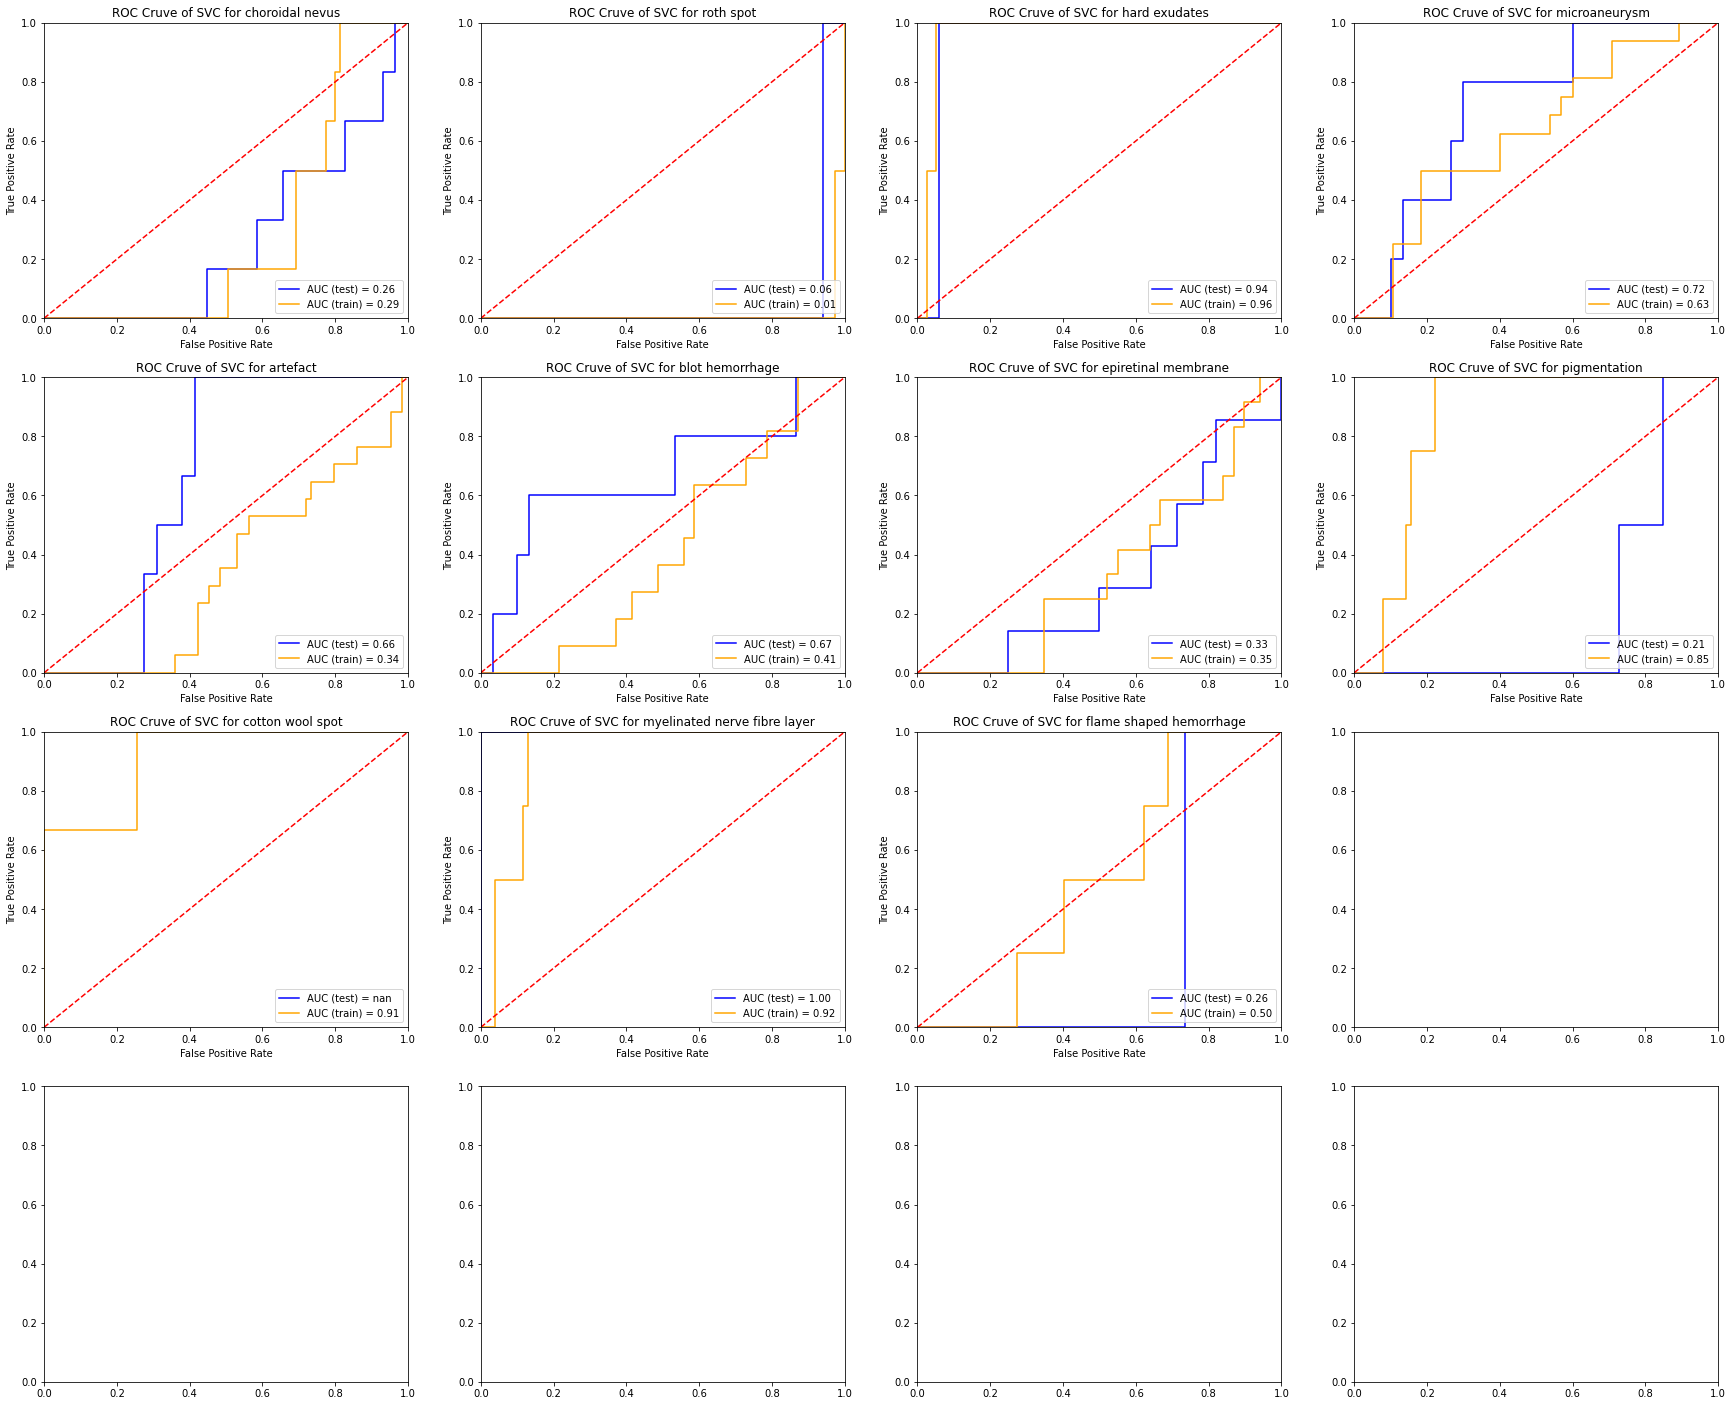

In [14]:
%matplotlib inline

from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
import math

y_proba_test = model.predict_proba(x_test)
y_proba_train = model.predict_proba(x_train)

fig, axs = plt.subplots(math.ceil((math.sqrt(len(categories)))),math.ceil((math.sqrt(len(categories)))), figsize=(30,25))
ax = axs.flat
for index, c in enumerate(categories):
  fpr, tpr, threshold = roc_curve(y_test, y_proba_test[:, 1], pos_label=index)
  t_fpr, t_tpr, t_threshold = roc_curve(y_train, y_proba_train[:, 1], pos_label=index)
  roc_auc = auc(fpr, tpr)
  roc_auc_train = auc(t_fpr, t_tpr)
  ax[index].plot(fpr, tpr, 'b', label = 'AUC (test) = %0.2f' % roc_auc)
  ax[index].plot(t_fpr, t_tpr, 'orange', label = 'AUC (train) = %0.2f' % roc_auc_train)
  ax[index].legend(loc = 'lower right')
  ax[index].plot([0, 1], [0, 1],'r--')
  ax[index].axis(xmin=0,xmax=1, ymin=0, ymax=1)
  ax[index].set_ylabel('True Positive Rate')
  ax[index].set_xlabel('False Positive Rate')
  ax[index].set_title(f'ROC Cruve of SVC for {c}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


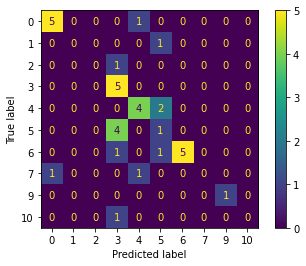

In [15]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)
plt.savefig("svc_overrepresented.png")

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.42      1.00      0.59         5
           4       0.67      0.67      0.67         6
           5       0.20      0.20      0.20         5
           6       1.00      0.71      0.83         7
           7       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.60        35
   macro avg       0.41      0.44      0.41        35
weighted avg       0.57      0.60      0.56        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Save the trained model into local disk
# This is important to not lose all the training effort
import pickle

pickle.dump(model.best_estimator_, open('./fundus_svm_best_model_underrep.pickle', 'wb'))

# Example code for using RandomForestClassifier

In [18]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0, n_jobs = -1, criterion = 'gini', max_depth= 100, max_features= 'log2')
param_grid={'criterion':['gini', 'entropy'],'max_depth': [30, 50, 100, 150], 'max_features': ['sqrt', 'log2']}
model = GridSearchCV(rfc, param_grid)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


The model is 54.285714285714285% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


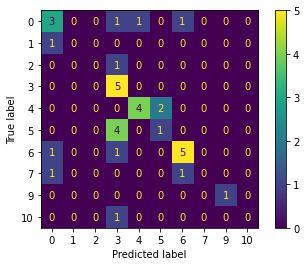

In [19]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)
plt.savefig("rfc_underrep.png")

In [20]:
print(f'Best RFC parameters: {model.best_params_}')

Best RFC parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt'}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


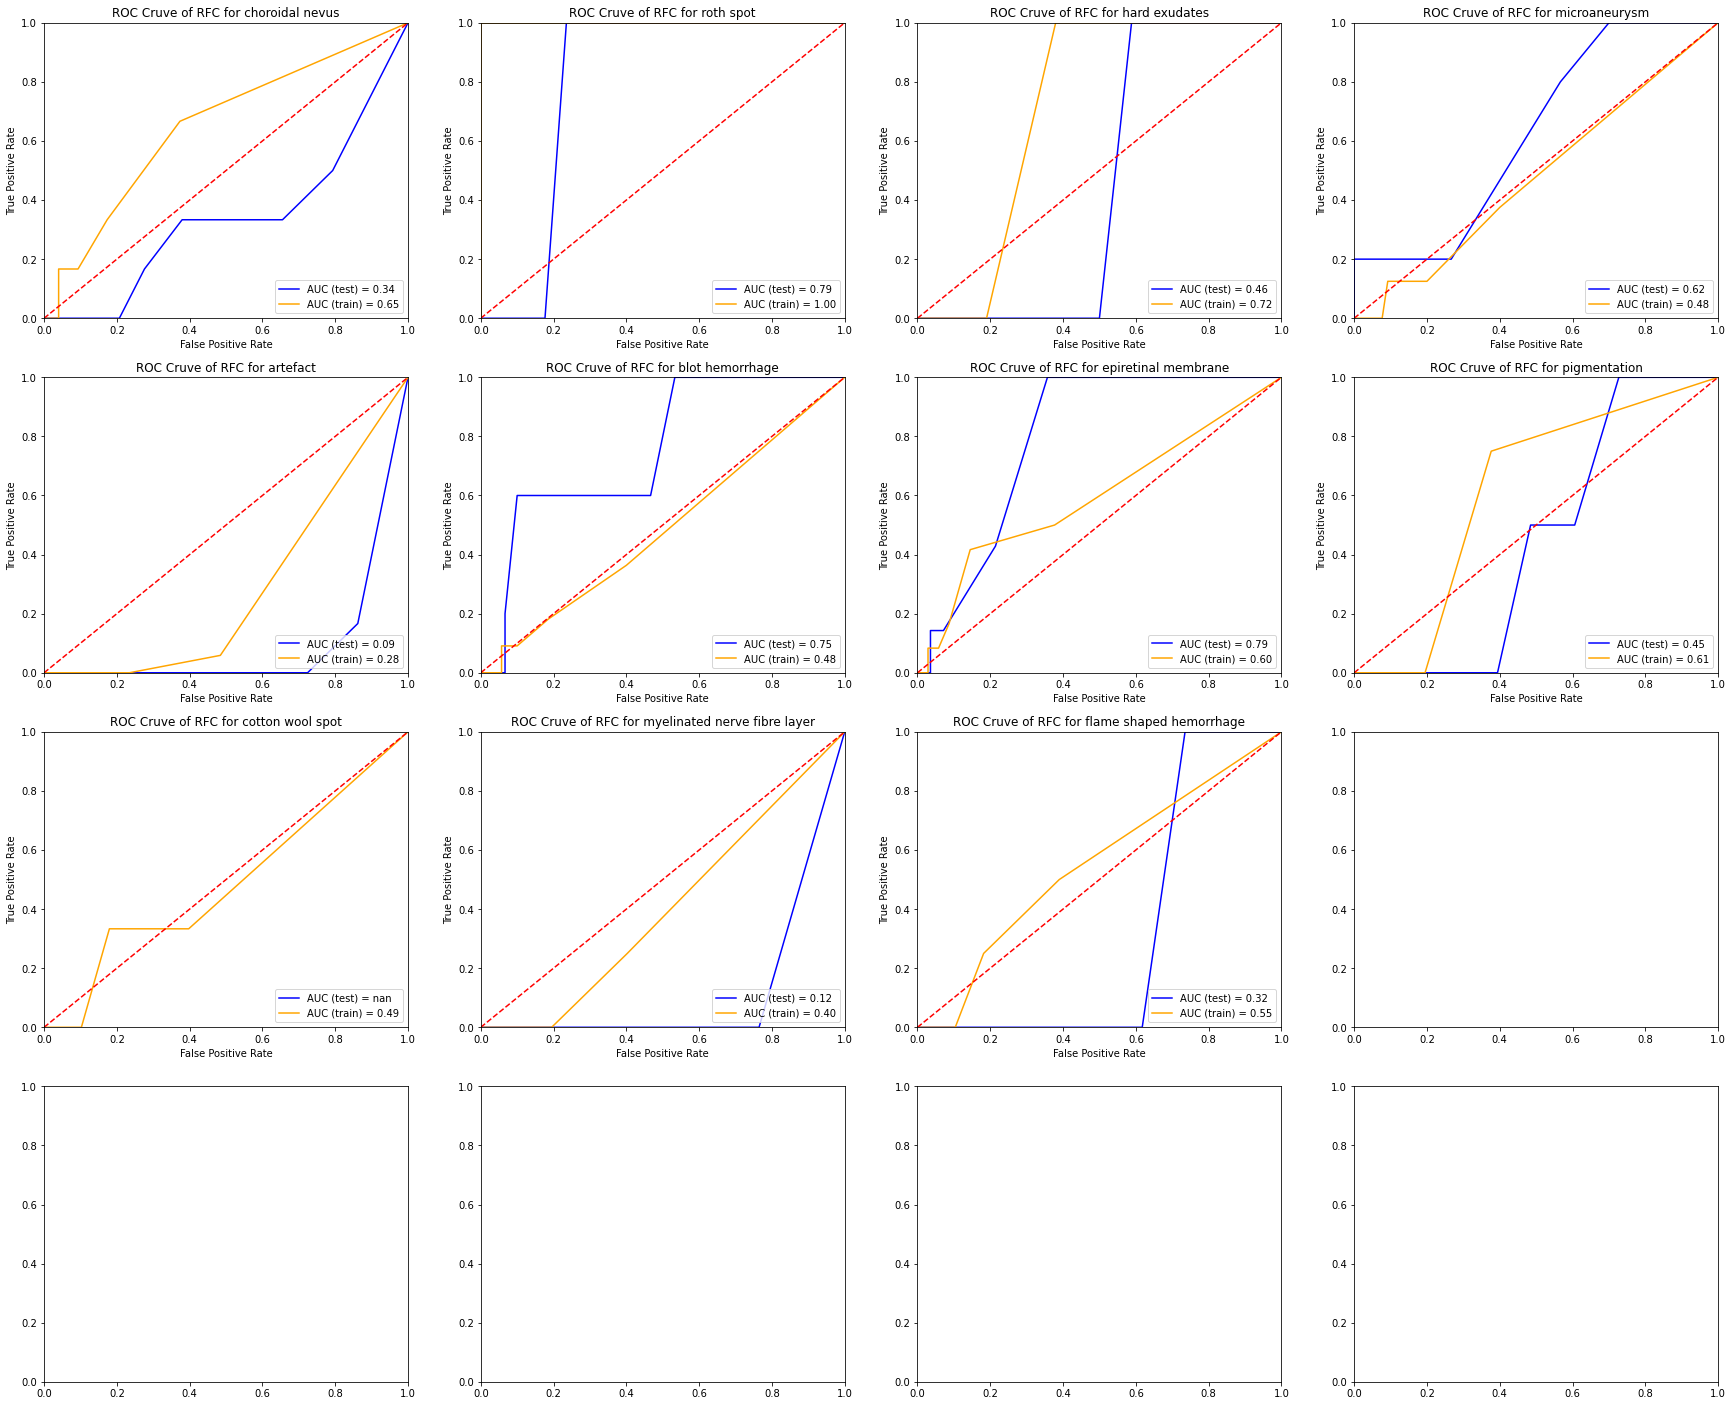

In [21]:
%matplotlib inline

from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
import math

y_proba_test = model.predict_proba(x_test)
y_proba_train = model.predict_proba(x_train)

fig, axs = plt.subplots(math.ceil((math.sqrt(len(categories)))),math.ceil((math.sqrt(len(categories)))), figsize=(30,25))
ax = axs.flat
for index, c in enumerate(categories):
  fpr, tpr, threshold = roc_curve(y_test, y_proba_test[:, 1], pos_label=index)
  t_fpr, t_tpr, t_threshold = roc_curve(y_train, y_proba_train[:, 1], pos_label=index)
  roc_auc = auc(fpr, tpr)
  roc_auc_train = auc(t_fpr, t_tpr)
  ax[index].plot(fpr, tpr, 'b', label = 'AUC (test) = %0.2f' % roc_auc)
  ax[index].plot(t_fpr, t_tpr, 'orange', label = 'AUC (train) = %0.2f' % roc_auc_train)
  ax[index].legend(loc = 'lower right')
  ax[index].plot([0, 1], [0, 1],'r--')
  ax[index].axis(xmin=0,xmax=1, ymin=0, ymax=1)
  ax[index].set_ylabel('True Positive Rate')
  ax[index].set_xlabel('False Positive Rate')
  ax[index].set_title(f'ROC Cruve of RFC for {c}')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.38      1.00      0.56         5
           4       0.80      0.67      0.73         6
           5       0.33      0.20      0.25         5
           6       0.71      0.71      0.71         7
           7       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.54        35
   macro avg       0.37      0.41      0.37        35
weighted avg       0.50      0.54      0.50        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Save the trained model into local disk
# This is important to not lose all the training effort
import pickle

pickle.dump(model, open('./fundus_rfc_best_model_underrep.pickle', 'wb'))

# KNN Classifier

In [24]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

scaler = StandardScaler()
x = scaler.fit_transform(x)

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 11], 'weights':['uniform','distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree'], 'n_jobs': [-1]}
model = GridSearchCV(knn, param_grid)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0, stratify=y)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"The K-NN model is {accuracy_score(y_pred,y_test)*100}% accurate")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


The K-NN model is 48.57142857142857% accurate


In [25]:
print(f'Best KNN parameters: {model.best_params_}')

Best KNN parameters: {'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 7, 'weights': 'distance'}


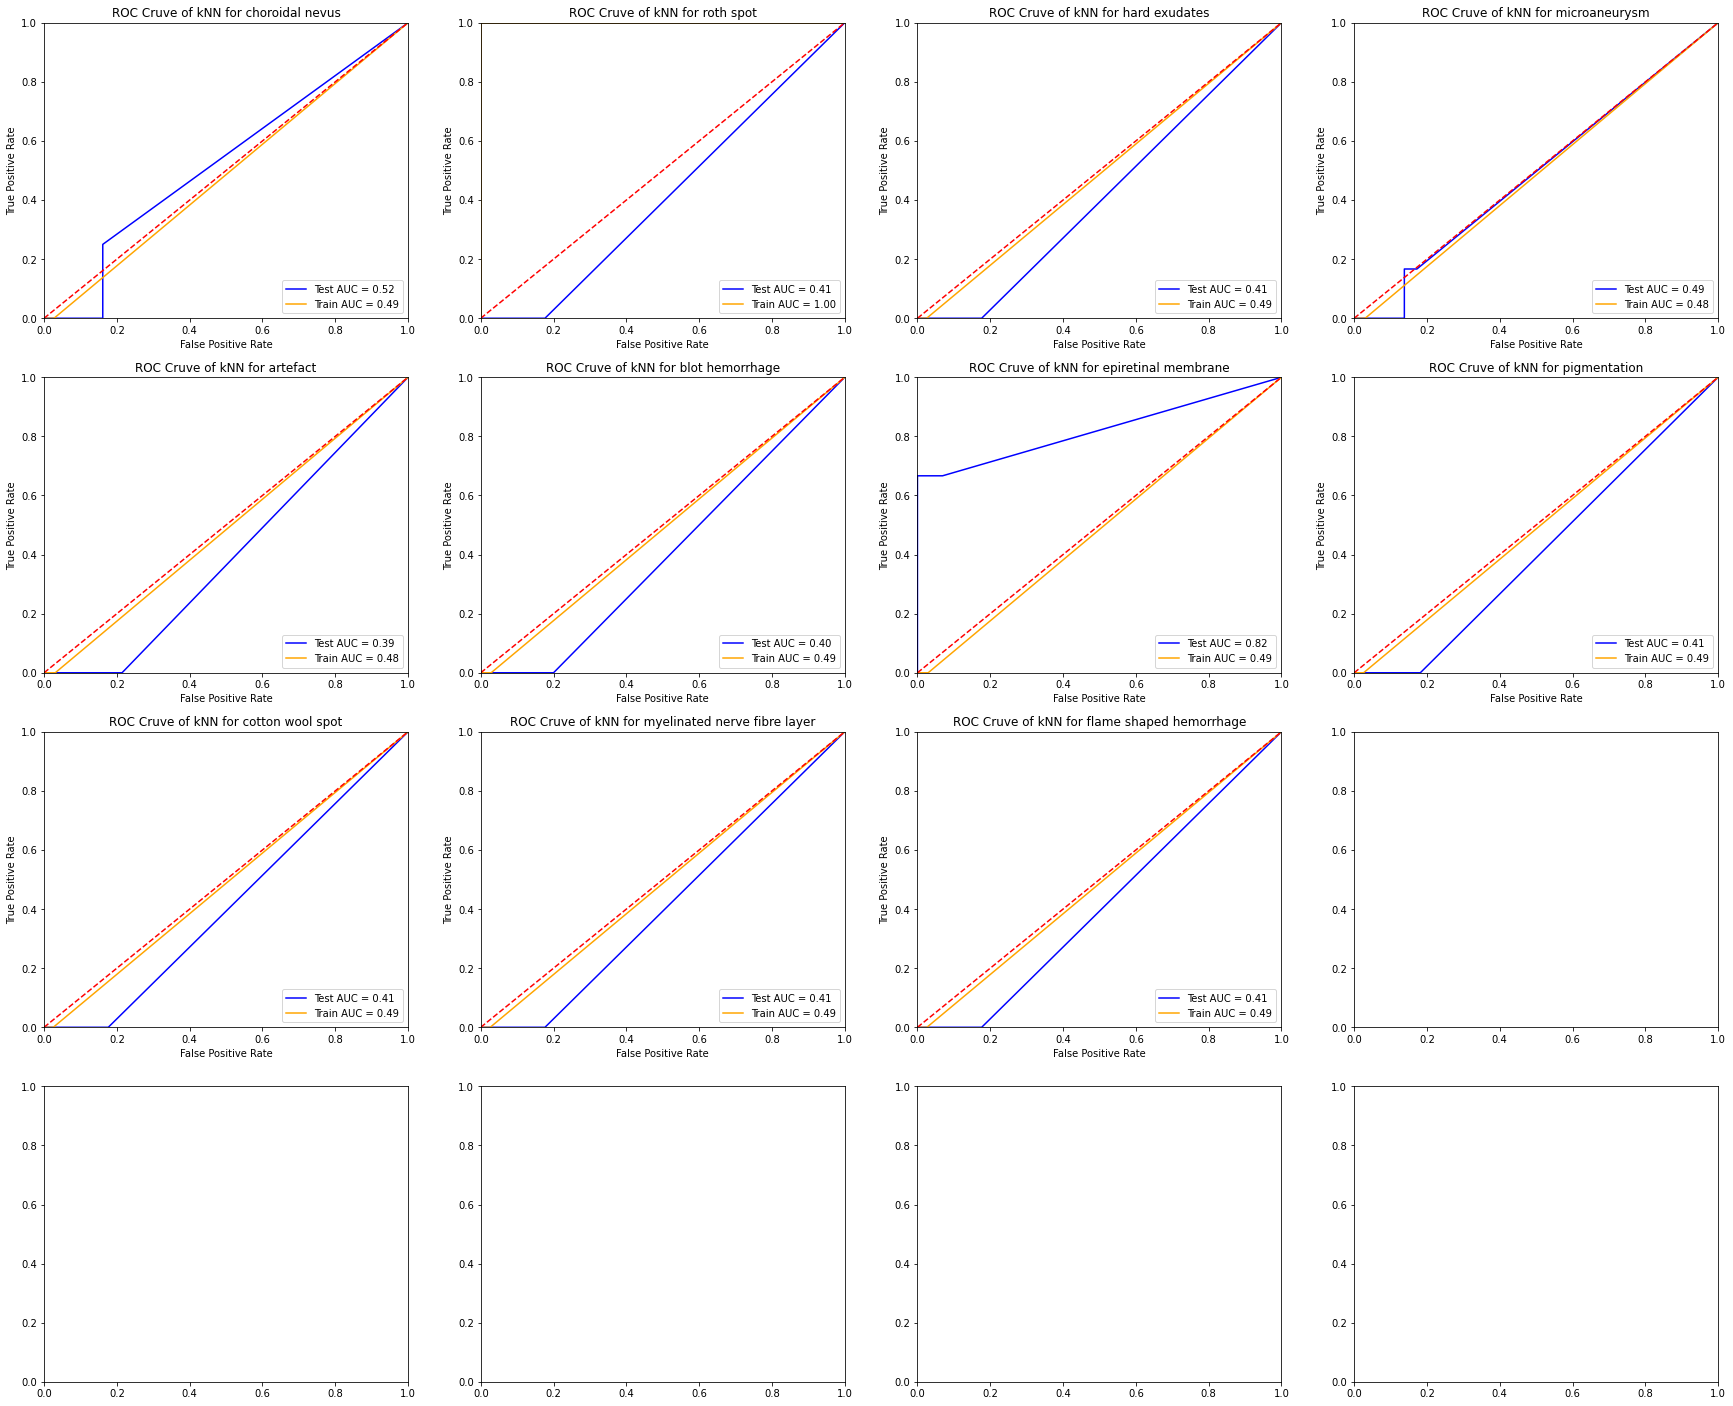

In [26]:
%matplotlib inline

from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt
import math

y_proba_test = model.predict_proba(x_test)
y_proba_train = model.predict_proba(x_train)

fig, axs = plt.subplots(math.ceil((math.sqrt(len(categories)))),math.ceil((math.sqrt(len(categories)))), figsize=(30,25))
ax = axs.flat
for index, c in enumerate(categories):
  fpr, tpr, threshold = roc_curve(y_test, y_proba_test[:, 1], pos_label=index)
  t_fpr, t_tpr, t_threshold = roc_curve(y_train, y_proba_train[:, 1], pos_label=index)
  roc_auc = auc(fpr, tpr)
  roc_auc_train = auc(t_fpr, t_tpr)
  ax[index].plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc)
  ax[index].plot(t_fpr, t_tpr, 'orange', label = 'Train AUC = %0.2f' % roc_auc_train)
  ax[index].legend(loc = 'lower right')
  ax[index].plot([0, 1], [0, 1],'r--')
  ax[index].axis(xmin=0,xmax=1, ymin=0, ymax=1)
  ax[index].set_ylabel('True Positive Rate')
  ax[index].set_xlabel('False Positive Rate')
  ax[index].set_title(f'ROC Cruve of kNN for {c}')

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.36      0.67      0.47         6
           4       0.50      0.43      0.46         7
           5       0.20      0.20      0.20         5
           6       0.80      0.67      0.73         6
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.50      1.00      0.67         1
          10       0.00      0.00      0.00         1

    accuracy                           0.49        35
   macro avg       0.28      0.36      0.30        35
weighted avg       0.42      0.49      0.44        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


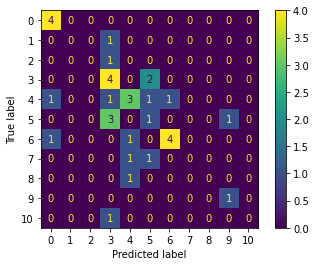

In [28]:
plot_confusion_matrix(model, x_test, y_test)

In [29]:
# Save the trained model into local disk
# This is important to not lose all the training effort
import pickle
pickle.dump(model.best_estimator_, open('./fundus_knn_best_model_underrep.pickle', 'wb'))

# Using Linear Discriminant Analysis

In [30]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
param_grid = {'solver':['svd', 'eigen'] }
model = GridSearchCV(lda, param_grid)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"The LDA model is {accuracy_score(y_pred,y_test)*100}% accurate")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:87: UserWarning: Only one sample available. You may want to reshape your data array
  "Only one sample available. You may want to reshape your data array"
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:87: UserWarning: Only one sample available. You may want to reshape your data array
  "Only one sample available. You may want to reshape your data array"
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_empirical_covariance.py:87: UserWarning: Only one sample available. You may want to reshape your data array
  "Only one sample available. You may want to reshape your data array"


The LDA model is 57.14285714285714% accurate


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 603, in fit
    covariance_estimator=self.covariance_estimator,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 440, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/lib

In [31]:
print(f'Best LDA parameters: {model.best_params_}')

Best LDA parameters: {'solver': 'svd'}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


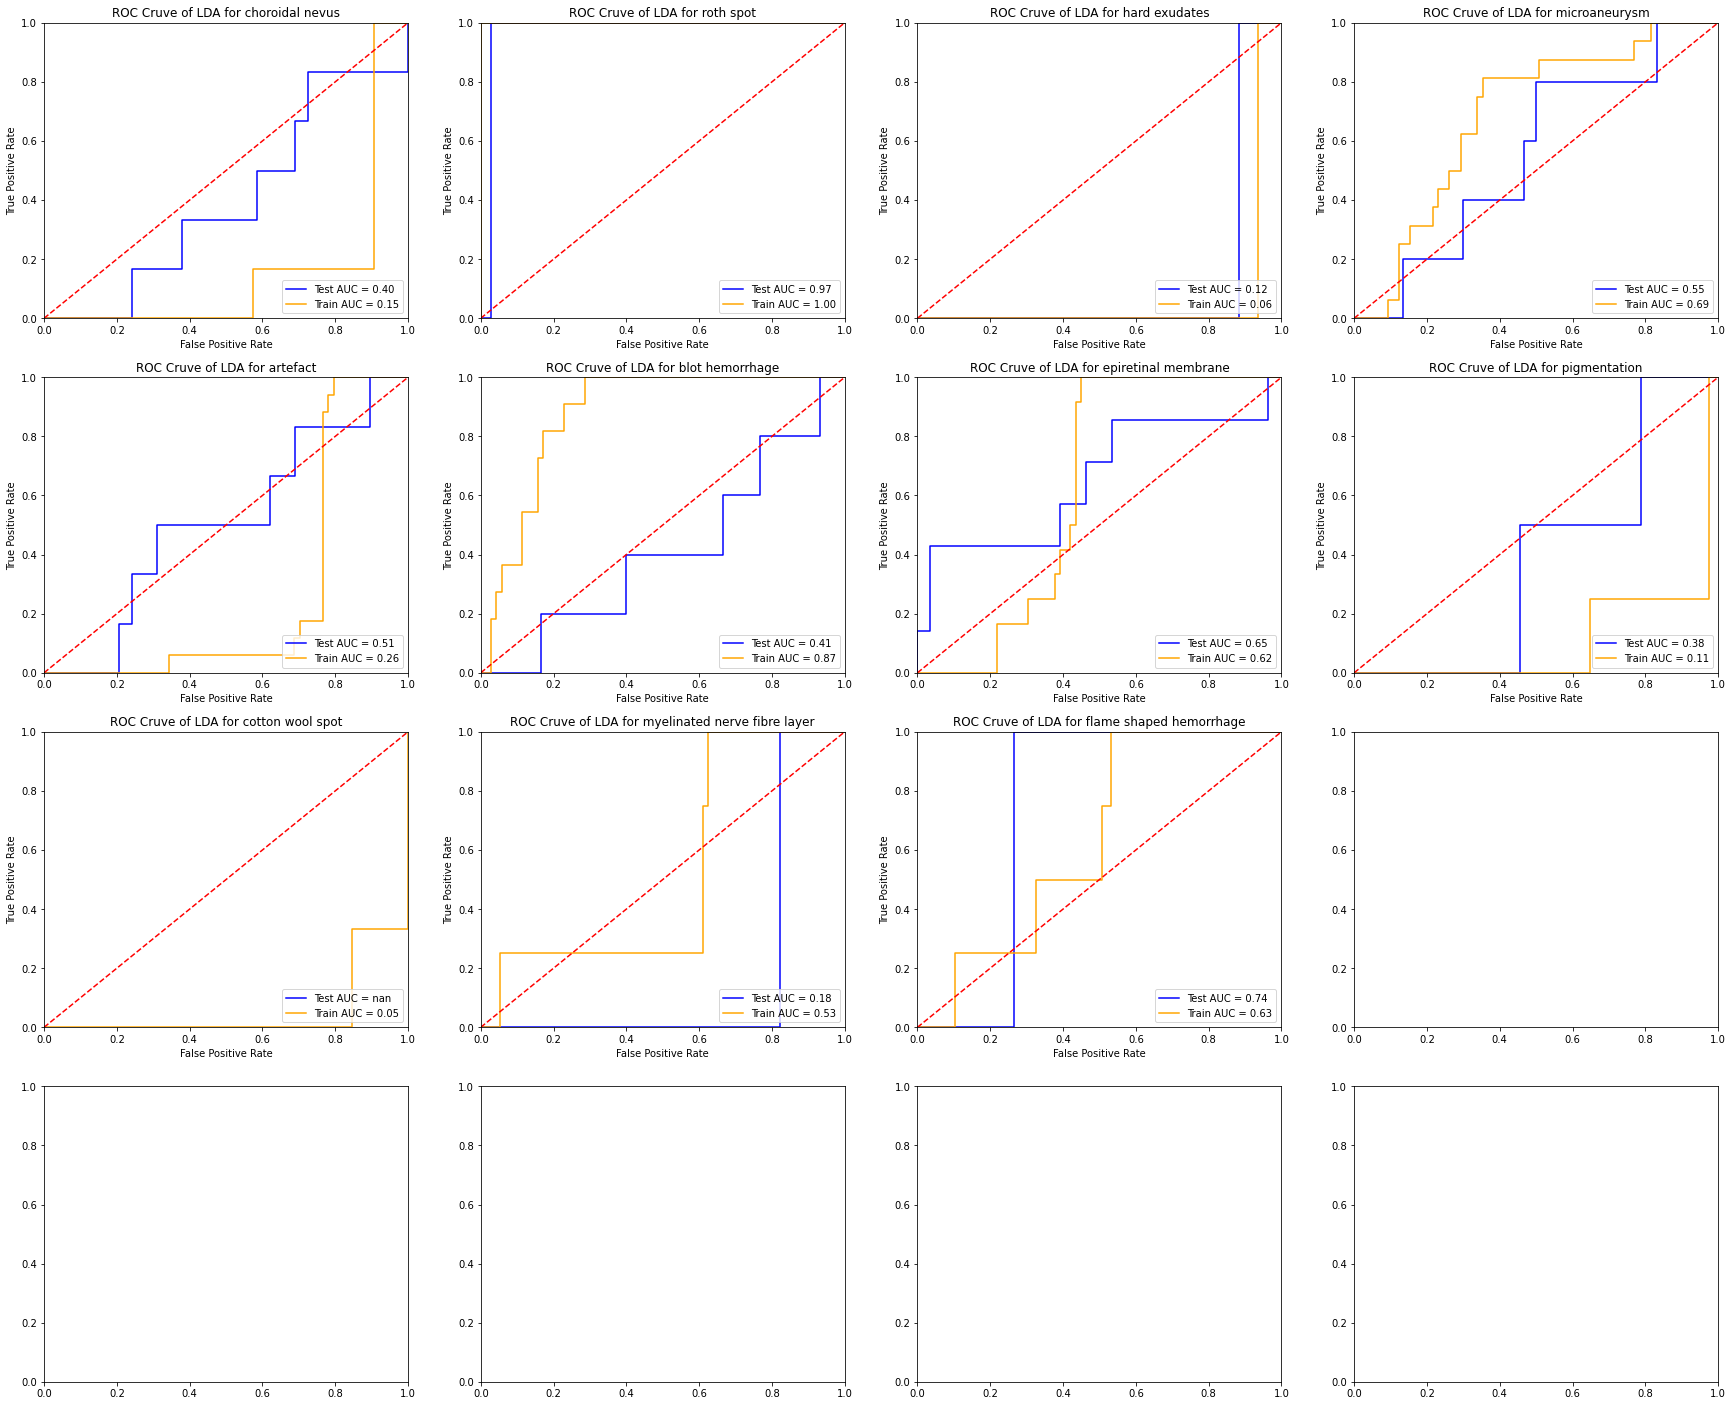

In [32]:
y_proba_test = model.predict_proba(x_test)
y_proba_train = model.predict_proba(x_train)

fig, axs = plt.subplots(math.ceil((math.sqrt(len(categories)))),math.ceil((math.sqrt(len(categories)))), figsize=(30,25))
ax = axs.flat
for index, c in enumerate(categories):
  fpr, tpr, threshold = roc_curve(y_test, y_proba_test[:, 1], pos_label=index)
  t_fpr, t_tpr, t_threshold = roc_curve(y_train, y_proba_train[:, 1], pos_label=index)
  roc_auc = auc(fpr, tpr)
  roc_auc_train = auc(t_fpr, t_tpr)
  ax[index].plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc)
  ax[index].plot(t_fpr, t_tpr, 'orange', label = 'Train AUC = %0.2f' % roc_auc_train)
  ax[index].legend(loc = 'lower right')
  ax[index].plot([0, 1], [0, 1],'r--')
  ax[index].axis(xmin=0,xmax=1, ymin=0, ymax=1)
  ax[index].set_ylabel('True Positive Rate')
  ax[index].set_xlabel('False Positive Rate')
  ax[index].set_title(f'ROC Cruve of LDA for {c}')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


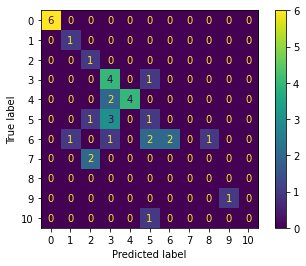

In [33]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.50      1.00      0.67         1
           2       0.25      1.00      0.40         1
           3       0.40      0.80      0.53         5
           4       1.00      0.67      0.80         6
           5       0.20      0.20      0.20         5
           6       1.00      0.29      0.44         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.57        35
   macro avg       0.49      0.54      0.46        35
weighted avg       0.68      0.57      0.56        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [35]:
# Save the trained model into local disk
# This is important to not lose all the training effort
import pickle

pickle.dump(model.best_estimator_, open('./fundus_lda_best_model_underrep.pickle', 'wb'))

# Demo
Demostrate the prediction capability of the trained model

Prediction using SVM model 
 ------------------- 

choroidal nevus = 11.425372006527368%
roth spot = 4.946859011233961%
hard exudates = 1.3782104927963728%
microaneurysm = 2.061416429173929%
artefact = 8.824290484474131%
blot hemorrhage = 3.0599287974711857%
epiretinal membrane = 46.91779033789156%
pigmentation = 2.8237047366313233%
cotton wool spot = 2.648229437313129%
myelinated nerve fibre layer = 13.530192229840946%
flame shaped hemorrhage = 2.384006036646075%
Expected: pigmentation, Prediction is: epiretinal membrane


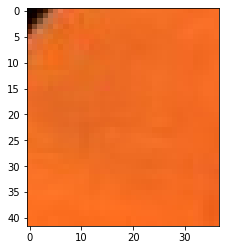

In [36]:
## Demo is here
demo_img = imread('./project_space/fundus.dataset/train/classes/pigmentation/148_185_196_238_eye_009_visit_1_image_2_png.rf.76f80c9b2bf6dceae351c2e067771d1b.jpg')
demo_img_resize = resize(demo_img, (25,25,3))
plt.imshow(demo_img)
l = [demo_img_resize.flatten()]

# Using SVM predictor
loaded_svm = pickle.load(open('./fundus_svm_best_model_underrep.pickle', 'rb'))
svm_probaility = loaded_svm.predict_proba(l)
print('Prediction using SVM model \n ------------------- \n')
for index, val in enumerate(categories):
  print(f'{val} = {svm_probaility[0][index]*100}%')
print('Expected: pigmentation, Prediction is: ' + categories[loaded_svm.predict(l)[0]])

In [37]:
loaded_rfc= pickle.load(open('./fundus_rfc_best_model_underrep.pickle', 'rb'))
rfc_probaility = loaded_svm.predict_proba(l)
print('Prediction using rfc model \n ------------------- \n')
for index, val in enumerate(categories):
  print(f'{val} = {rfc_probaility[0][index]*100}%')
print('Expected: pigmentation, Prediction is: ' + categories[loaded_rfc.predict(l)[0]])


Prediction using rfc model 
 ------------------- 

choroidal nevus = 11.425372006527368%
roth spot = 4.946859011233961%
hard exudates = 1.3782104927963728%
microaneurysm = 2.061416429173929%
artefact = 8.824290484474131%
blot hemorrhage = 3.0599287974711857%
epiretinal membrane = 46.91779033789156%
pigmentation = 2.8237047366313233%
cotton wool spot = 2.648229437313129%
myelinated nerve fibre layer = 13.530192229840946%
flame shaped hemorrhage = 2.384006036646075%
Expected: pigmentation, Prediction is: epiretinal membrane


Prediction using KNN model 
 ------------------- 

choroidal nevus = 0.0%
roth spot = 0.0%
hard exudates = 0.0%
microaneurysm = 12.876304160483887%
artefact = 73.11503112299773%
blot hemorrhage = 0.0%
epiretinal membrane = 14.008664716518368%
pigmentation = 0.0%
cotton wool spot = 0.0%
myelinated nerve fibre layer = 0.0%
flame shaped hemorrhage = 0.0%
Expected: pigmentation, Prediction is: artefact


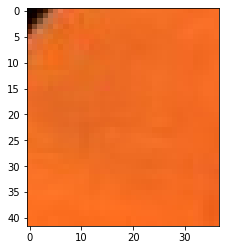

In [38]:
## Demo is here
demo_img = imread('./project_space/fundus.dataset/train/classes/pigmentation/148_185_196_238_eye_009_visit_1_image_2_png.rf.76f80c9b2bf6dceae351c2e067771d1b.jpg')
demo_img_resize = resize(demo_img, (25,25,3))
plt.imshow(demo_img)
l = [demo_img_resize.flatten()]

# Using KNN predictor
loaded_knn = pickle.load(open('./fundus_knn_best_model_underrep.pickle', 'rb'))
knn_probaility = loaded_knn.predict_proba(l)
print('Prediction using KNN model \n ------------------- \n')
for index, val in enumerate(categories):
  print(f'{val} = {knn_probaility[0][index]*100}%')
print('Expected: pigmentation, Prediction is: ' + categories[loaded_knn.predict(l)[0]])

In [39]:
# Using KNN predictor
loaded_lda = pickle.load(open('./fundus_lda_best_model_underrep.pickle', 'rb'))
lda_probaility = loaded_lda.predict_proba(l)
print('Prediction using LDA model \n ------------------- \n')
for index, val in enumerate(categories):
  print(f'{val} = {lda_probaility[0][index]*100}%')
print('Expected: pigmentation, Prediction is: ' + categories[loaded_lda.predict(l)[0]])

Prediction using LDA model 
 ------------------- 

choroidal nevus = 3.197324265283097%
roth spot = 1.4648055005348332e-33%
hard exudates = 1.2104638688798113e-17%
microaneurysm = 0.0033071573632236723%
artefact = 3.4687835159627307e-07%
blot hemorrhage = 5.319449682544318e-06%
epiretinal membrane = 1.591307995572148e-07%
pigmentation = 96.79704685683515%
cotton wool spot = 5.403900665246323e-30%
myelinated nerve fibre layer = 2.357713587525623e-14%
flame shaped hemorrhage = 0.0023158950596644428%
Expected: pigmentation, Prediction is: pigmentation
